In [16]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
emp=pd.read_csv('hr_employee_churn_data.csv')

In [3]:
emp.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [5]:
emp.drop('empid',axis=1,inplace=True)

# Feature Engineering

In [21]:
emp.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [10]:
sal = lab_enc.fit_transform(emp.salary)
sal

array([1, 2, 2, ..., 1, 1, 1])

In [11]:
emp2 = emp.copy()

In [12]:
emp2.salary=sal

In [13]:
emp2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,2,1
2,0.11,0.88,7,272,4,0,0,2,1
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1


In [14]:
emp2.isna().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [17]:
emp2['satisfaction_level'].fillna(emp2['satisfaction_level'].mean(),inplace=True)

In [19]:
emp2.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

# Splitting Dataset into Training and Testing Sets

In [22]:
x=emp2.drop('left',axis=1)
y=emp2['left']

In [23]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
emp2.shape

(14999, 9)

In [24]:
x_train.shape

(11999, 8)

In [28]:
x_test.shape

(3000, 8)

# Model Selection

In [46]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
#as is it is classification problem we are going to use either Random forest or XGBoost

model_param={
    'RandomForestClassifier' :{
    'model' : RandomForestClassifier(),
    'param':{
       'n_estimators' : [15,30,80,150],
        'max_depth' : range(2,4,1),
        'criterion' : ['entropy','gini'],
        'max_features':['auto','log2']
    }
},
    "XGBClassifier":{
        'model':XGBClassifier(),
        'param':{
            'n_estimators' : [10,25,75,200],
            'max_depth' :[3,5,10],
            'learning_rate' : [0.1,0.01,0.2,0.5]
        }
    }
}

In [49]:
acc=[]
for model_,mp in model_param.items():
    model_selected = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=6,return_train_score=False)
    model_selected.fit(x_train,y_train)
    acc.append({
        'model':model_selected,
        'best_score':model_selected.best_score_,
        'best_param':model_selected.best_params_
    }
    )
    

In [50]:
acc

[{'model': GridSearchCV(cv=6, estimator=RandomForestClassifier(),
               param_grid={'criterion': ['entropy', 'gini'],
                           'max_depth': range(2, 4),
                           'max_features': ['auto', 'log2'],
                           'n_estimators': [15, 30, 80, 150]}),
  'best_score': 0.9173265382691346,
  'best_param': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 15}},
 {'model': GridSearchCV(cv=6,
               estimator=XGBClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False, eval_metric=None,
                                       feature_types=None, gamma=None,
          

# Building Model

In [51]:
xg_model=XGBClassifier(objective='binary:logistic',n_estimators=200,max_depth=10,learning_rate=0.1)

In [52]:
xg_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
xg_model.score(x_train,y_train)

0.9986665555462956

In [63]:
x_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
11908,0.67,0.39,2,207,7,0,0,2
10508,0.51,0.98,4,245,3,0,0,2
9193,0.66,0.54,2,136,2,0,0,1
13087,0.53,0.81,3,275,2,0,0,1
506,0.83,0.98,4,259,5,0,0,2


In [56]:
x_train[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
2560,0.68,0.7,4,185,4,0,0,2


In [57]:
xg_model.predict(x_train[:1])

array([0])

In [58]:
emp2.loc[2560]

satisfaction_level         0.68
last_evaluation            0.70
number_project             4.00
average_montly_hours     185.00
time_spend_company         4.00
Work_accident              0.00
promotion_last_5years      0.00
salary                     2.00
left                       0.00
Name: 2560, dtype: float64

In [59]:
from sklearn.metrics import confusion_matrix

cnm=confusion_matrix(y_test,xg_model.predict(x_test))
cnm

array([[2281,    6],
       [  20,  693]], dtype=int64)

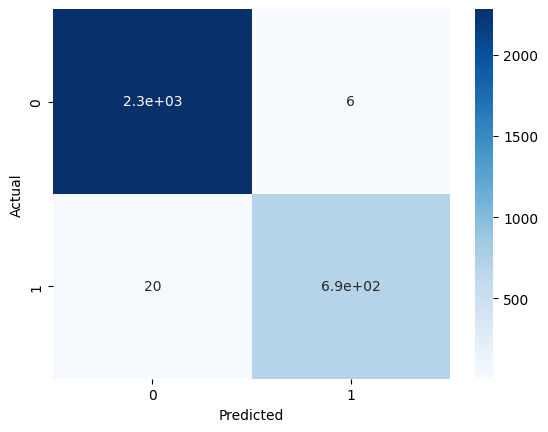

In [62]:
sns.heatmap(cnm,cmap='Blues',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()